## Geographical Visualizations

## Table of Contents:
    1. Import libraries and data
    2. Data wrangling
    3. Consistency Checks
    4. Plotting a choropleth
    5. Results

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path

path = r'/Users/jodikim/02_2023_Death_Penalty_Analysis'

In [4]:
# Import data for project

df = pd.read_csv(r'/Users/jodikim/02_2023_Death_Penalty_Analysis/02_Data/Prepared_Data/us_executions_cleaned.csv', index_col = False)

In [5]:
# Import us states json file

country_geo = r'/Users/jodikim/02_2023_Death_Penalty_Analysis/02_Data/Practice_Data/us-states.json'

In [6]:
df.head()

Unnamed: 0  id execution_volunteer  number_victims juvenile   race   sex  \
0           0   1                 yes               1       no  White  Male   
1           1   2                  no               1       no  White  Male   
2           2   3                 yes               1       no  White  Male   
3           3   4                 yes               4       no  White  Male   
4           4   5                 yes               1       no  White  Male   

    region        country     state  ... asian_male_victims  \
0     West  United States      Utah  ...                  0   
1    South  United States   Florida  ...                  0   
2     West  United States    Nevada  ...                  0   
3  Midwest  United States   Indiana  ...                  0   
4    South  United States  Virginia  ...                  0   

  native_amer_male_victims  other_race_male_victims  white_female_victims  \
0                        0                        0                     0   
1                        0                        0                     0   
2                        0                        0                     0   
3                        0                        0                     2   
4                        0                        0                     0   

   black_female_victims  latino_female_victims  asian_female_victims  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   amerind_nativealask_female_victims  other_race_female_victims  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   

   victims_races  
0          White  
1          White  
2          White  
3          White  
4          White  

[5 rows x 25 columns]

In [7]:
# Dropping column 'unnamed'

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(1561, 24)

### 2. Data wrangling

In [9]:
# Selecting only the necessary columns, putting in a list called columns

columns = ["id", "execution_volunteer", "number_victims", "race", "sex", "state"]

In [10]:
# Creating a subset 

state_id = df[columns]

In [11]:
state_id.head()

id execution_volunteer  number_victims   race   sex     state
0   1                 yes               1  White  Male      Utah
1   2                  no               1  White  Male   Florida
2   3                 yes               1  White  Male    Nevada
3   4                 yes               4  White  Male   Indiana
4   5                 yes               1  White  Male  Virginia

### 3. Consistency Checks

In [12]:
# Checking for missing values

state_id.isnull().sum()

id                     0
execution_volunteer    0
number_victims         0
race                   0
sex                    0
state                  0
dtype: int64

In [13]:
# Checking for duplicates

dups = state_id.duplicated()

In [14]:
dups.shape # no dups

(1561,)

<AxesSubplot:xlabel='number_victims', ylabel='Count'>

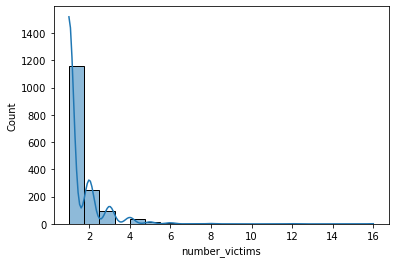

In [15]:
# Extreme values check

sns.histplot(state_id['number_victims'], bins=20, kde = True)

### 4. Plotting a choropleth

In [16]:
# Based on one of my hypothesis, lets focus on the state and id

df1 = df.groupby('state')['id'].count()
df1.head(20)

state
Alabama        70
Arizona        40
Arkansas       31
California     13
Colorado        1
Connecticut     1
Delaware       16
Federal        16
Florida        99
Georgia        76
Idaho           3
Illinois       12
Indiana        20
Kentucky        3
Louisiana      28
Maryland        5
Mississippi    23
Missouri       94
Montana         3
Nebraska        4
Name: id, dtype: int64

In [17]:
# Lets setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = df1,
    columns = ['state', 'id'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.9, 
    nan_fill_color = 'white',
    line_opacity=0.1,
    legend_name = "State Execution Rates").add_to(map)
folium.LayerControl().add_to(map)

map

In [18]:
# Adjusting the color to see what works best
map = folium.Map(location=[100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = df1,
    columns = ['state', 'id'],
    key_on = 'feature.properties.name', 
    fill_color = 'PuBuGn', fill_opacity=0.9, 
    nan_fill_color = 'white',
    line_opacity=0.1,
    legend_name = "State Execution Rates").add_to(map)
folium.LayerControl().add_to(map)

map

In [19]:
# Adjusting the color to see what works best. I like this color palette best. 
map = folium.Map(location=[100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = df1,
    columns = ['state', 'id'],
    key_on = 'feature.properties.name', 
    fill_color = 'OrRd', fill_opacity=0.9, 
    nan_fill_color = 'white',
    line_opacity=0.1,
    legend_name = "State Execution Rates").add_to(map)
folium.LayerControl().add_to(map)

map

In [20]:
map.save('plot_data.html')

### 5. Results

#### Discuss the results and what they mean in a markdown section.
    
    1. Does the analysis answer any of your existing research questions?
    
    Yes, this answers the question: Which states have the highest execution rates? According to this visualization it is Texas, Oklahoma, Virgina and Florida. 
    
    2. Does the analysis lead you to any new research questions?
    
    Why does the Southern region of the US have the most executions? I don't know that this question can be answered with this dataset as there is limited data on the people and the circumstances around why they've been executed. 
    
    Why does Texas have the highest rates of execution? What is leading to this? 
